In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import shutil

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
#!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

#!unzip cats_and_dogs.zip
import errno
try:
    os.makedirs('cats_and_dogs/test2/test')
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')


# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

contenidos=os.listdir(test_dir)
for elemento in contenidos:
      shutil.copy(test_dir+"/"+elemento, 'cats_and_dogs/test2/test')

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
import random

#set a seed and then replicate the result
seed = random.randint(0, 1000)
print('Seed : ', seed)
tf.random.set_seed(seed)
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test2')
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Semilla :  421


In [ ]:
# 3
#Create image generators for each of the three image data sets
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
                                                            directory=train_dir,
                                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                            color_mode="rgb",
                                                            batch_size=batch_size,
                                                            class_mode="binary",
                                                            shuffle=True,
                                                            #seed=42
                                                        )
val_data_gen = validation_image_generator.flow_from_directory(
                                                            directory=validation_dir,
                                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                            color_mode="rgb",
                                                            batch_size=batch_size,
                                                            class_mode="binary",
                                                            shuffle=True,
                                                            #seed=42
                                                        )
test_data_gen = test_image_generator.flow_from_directory(
                                                            directory="/content/cats_and_dogs/test2",
                                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                            color_mode="rgb",
                                                            batch_size=batch_size,
                                                            class_mode="binary",
                                                            shuffle=False,
                                                            #seed=42
                                                        )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


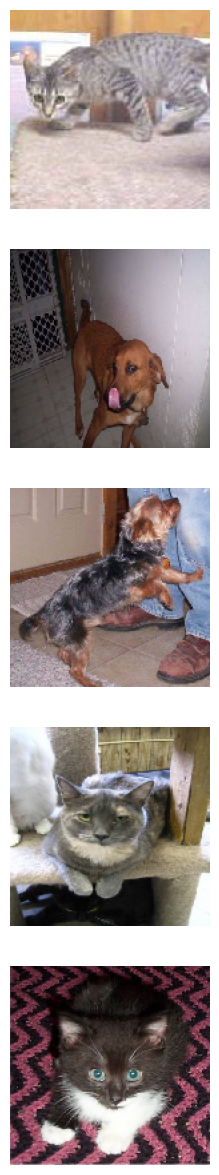

In [ ]:
# 4
#The plotImages function will be used a few times to plot images. It takes an array of images and a probabilities list, although the probabilities list is optional
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
#Recreate the train_image_generator using ImageDataGenerator.
train_image_generator = ImageDataGenerator(
                                          #featurewise_center=True,
                                          #featurewise_std_normalization=True,
                                          rotation_range=20,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          horizontal_flip=True,
                                          rescale=1./255,
                                          validation_split=0.2)


Found 2000 images belonging to 2 classes.


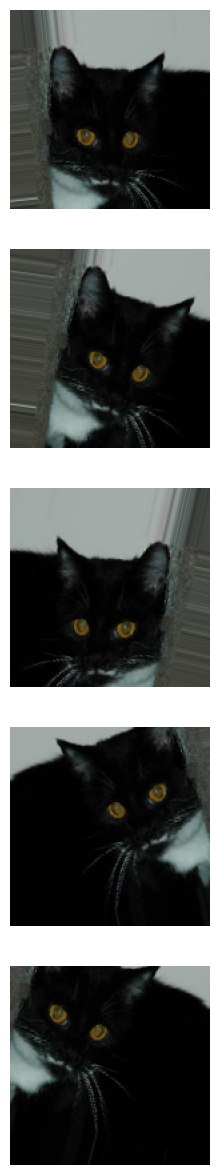

In [ ]:
# Since there are a small number of training examples, there is a risk of overfitting. 
# One way to fix this problem is by creating more training data from existing training examples by using random transformations.


#Add 4-6 random transformations as arguments to ImageDataGenerator
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


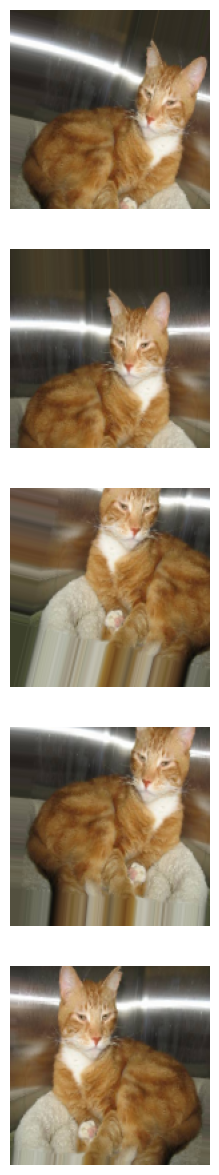

In [ ]:
# 6
#a single image is plotted five different times using different variations.
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
#create a model for the neural network that outputs class probabilities
model = Sequential([
  #Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(2)
])
# model = Sequential()

# # Add Conv2D and MaxPooling2D layers
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))

# # Flatten the output before the fully connected layer
# model.add(Flatten())

# # Add a fully connected layer with ReLU activation
# model.add(Dense(512, activation='relu'))

# # Output layer with softmax activation for class probabilities
# model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #loss="binary_crossentropy",
              metrics=['accuracy'])


#model.summary()

In [ ]:
# 8
#train the network
epochs=15

#steps_per_epoch = len(train_data_gen)//batch_size

#validation_steps = len(test_data_gen)//batch_size

history = model.fit(
  x=train_data_gen,
  #y = test_data_gen,
  steps_per_epoch=10,
  epochs=epochs,
  validation_data=val_data_gen,
  #validation_steps=128
)

Epoch 1/15
10/10 [==============================] - 51s 5s/step - loss: 0.9773 - accuracy: 0.4968 - val_loss: 0.6911 - val_accuracy: 0.5020
Epoch 2/15
10/10 [==============================] - 50s 5s/step - loss: 0.6941 - accuracy: 0.5089 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 3/15
10/10 [==============================] - 51s 5s/step - loss: 0.6937 - accuracy: 0.4959 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 4/15
10/10 [==============================] - 51s 5s/step - loss: 0.6930 - accuracy: 0.5102 - val_loss: 0.6920 - val_accuracy: 0.5730
Epoch 5/15
10/10 [==============================] - 46s 5s/step - loss: 0.6875 - accuracy: 0.5593 - val_loss: 0.7087 - val_accuracy: 0.5030
Epoch 6/15
10/10 [==============================] - 48s 5s/step - loss: 0.6907 - accuracy: 0.5430 - val_loss: 0.6844 - val_accuracy: 0.5410
Epoch 7/15
10/10 [==============================] - 50s 5s/step - loss: 0.6853 - accuracy: 0.5657 - val_loss: 0.6674 - val_accuracy: 0.6010
Epoch 8/15
10/10 [==

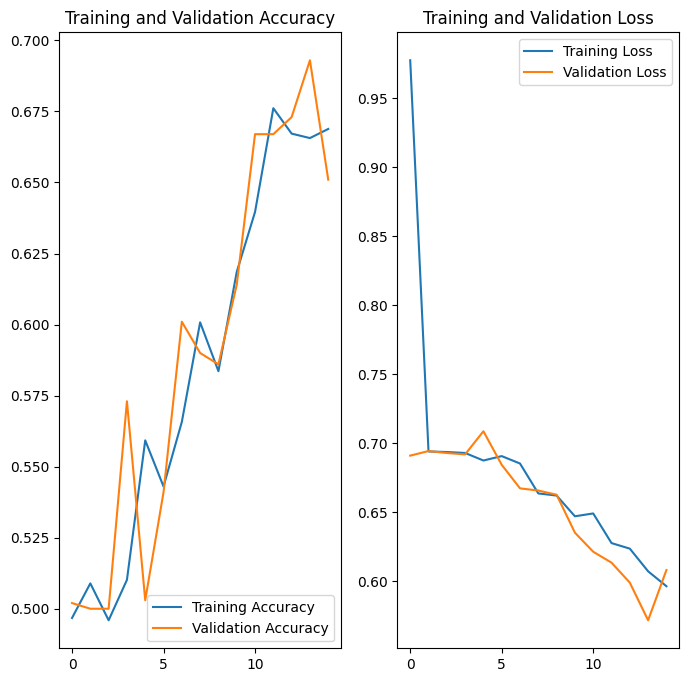

In [ ]:
# 9
#visualize the accuracy and loss of the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 489ms/step
[[-0.65337074  0.5928205 ]
 [-0.02517447 -0.0893323 ]
 [ 0.47565103 -0.34667513]
 [-0.7515371   0.53858566]
 [-0.23014347  0.2182586 ]
 [-0.24336596  0.2620442 ]
 [-0.7866421   0.73373795]
 [ 0.21861072 -0.16833669]
 [-0.35134274  0.29000014]
 [-0.91041815  0.599633  ]
 [-0.3388264   0.2728546 ]
 [-0.40530476  0.45654878]
 [ 0.30711043 -0.18274184]
 [ 0.07090069 -0.30686095]
 [-0.50430286  0.45266837]
 [-0.975688    0.67038566]
 [-0.68825287  0.5746079 ]
 [-1.096466    0.74430364]
 [-0.8414958   0.80517155]
 [-0.8522365   0.6397739 ]
 [ 0.7497548  -0.5964892 ]
 [-1.2717773   1.0533819 ]
 [-0.1982539   0.26544333]
 [-0.6638324   0.62529534]
 [-0.6876719   0.55384165]
 [-0.20138669  0.20242362]
 [-0.82178783  0.4233484 ]
 [ 0.24091037 -0.08752842]
 [-0.21337342  0.182257  ]
 [-0.40031248  0.32557184]
 [ 0.4251213  -0.3674727 ]
 [ 0.24860448 -0.23549797]
 [-1.183761    0.85002375]
 [-2.764275    1.8898228 ]
 [ 0.25102338 -0.12739302]
 [

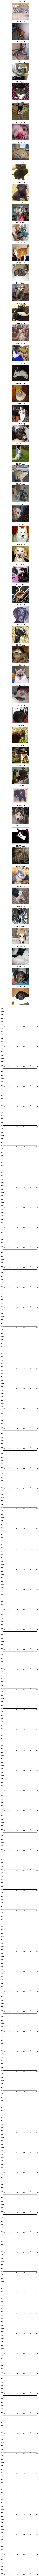

In [ ]:
#predict whether a brand new image is a cat or a dog
probabilitie = model.predict(test_data_gen)
print(probabilitie)
probabilitie = probabilitie.tolist()
type(probabilitie)
print(probabilitie)
#lista = [[max(0, min(1, round(elemento))) for elemento in sublista] for sublista in probabilitie]
#print(lista)
probabilities = [sublista[1] for sublista in probabilitie]
print(probabilities)
sample_test_images, _ = next(test_data_gen)
plotImages(sample_training_images, probabilities)

In [ ]:
# 11
#passed the challenge or keep trying

answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 74.0% of the images of cats and dogs.
You passed the challenge!
